<a href="https://colab.research.google.com/github/bradykuo/clustering-and-classifying-the-wine-dataset/blob/main/winequality_clustering_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Setting up the Environment and Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### Import Data from Github

In [20]:
# Load the red winequality dataset
url = "https://raw.githubusercontent.com/bradykuo/clustering-and-classifying-the-wine-dataset/main/winequality-red.csv"
df = pd.read_csv(url)

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Divide the winequality dataset into three groups

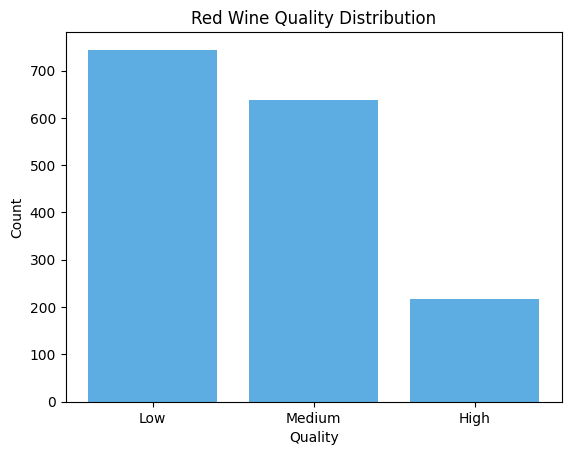

In [21]:
# Split the data into features (X) and target variable (y)
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
quality_mapping = { 3 : "Low",4 : "Low",5: "Low",6 : "Medium",7: "High",8 : "High",9 : "High"}
y =  df['quality'].map(quality_mapping)

# Define the counts for each quality level
quality_counts = y.value_counts()

# Create a bar plot
plt.bar(quality_counts.index, quality_counts.values, color='#5DADE2')

# Set the title and axis labels
plt.title('Red Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

### Comparison of Machine Learning Classification Models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris

### Logistic Regression Model

In [6]:
# Define the logistic regression model
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
logreg_scores = cross_val_score(logreg, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", logreg_scores)

# Calculate and print the mean accuracy score across all folds
print("\nLogistic Regression Mean accuracy score:", logreg_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Accuracy scores for each fold:
 [0.58076923 0.57384615 0.58891455 0.56889915 0.54965358]

Logistic Regression Mean accuracy score: 0.5724165334280807


### K-Nearest Neighbors Model

In [7]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
knn_scores = cross_val_score(knn, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", knn_scores)

# Calculate and print the mean accuracy score across all folds
print("\nKNN Mean accuracy score:", knn_scores.mean())

Accuracy scores for each fold:
 [0.50230769 0.52923077 0.52809854 0.5134719  0.5134719 ]

KNN Mean accuracy score: 0.5173161603600402


### Linear Discriminant Analysis

In [8]:
# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
lda_scores = cross_val_score(lda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", lda_scores)

# Calculate and print the mean accuracy score across all folds
print("\nLDA Mean accuracy score:", lda_scores.mean())

Accuracy scores for each fold:
 [0.58       0.55615385 0.59969207 0.56428022 0.5704388 ]

LDA Mean accuracy score: 0.5741129863208385


### Quadratic Discriminant Analysis Model

In [9]:
# Define the QDA model
qda = QuadraticDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
qda_scores = cross_val_score(qda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", qda_scores)

# Calculate and print the mean accuracy score across all folds
print("\nQDA Mean accuracy score:", qda_scores.mean())

Accuracy scores for each fold:
 [0.53384615 0.51461538 0.54811393 0.51501155 0.52270978]

QDA Mean accuracy score: 0.5268593592704447


### Random Forest Model

In [10]:
# Define the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rf, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", rf_scores)

# Calculate and print the mean accuracy score across all folds
print("\nRandom Forest Mean accuracy score:", rf_scores.mean())

Accuracy scores for each fold:
 [0.72       0.72076923 0.74903772 0.72671286 0.70361817]

Random Forest Mean accuracy score: 0.7240275951915676


### Comparative Analysis of Model Performance

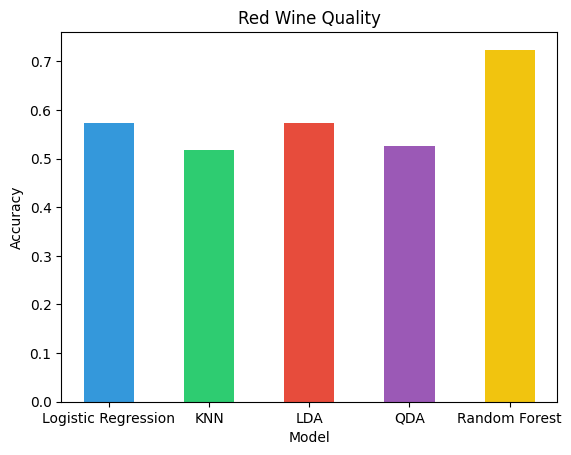

In [11]:
# Set x-axis labels
labels = ['Logistic Regression', 'KNN', 'LDA', 'QDA', 'Random Forest']

# Set y-axis values
values = [logreg_scores.mean(), knn_scores.mean(), lda_scores.mean(), qda_scores.mean(), rf_scores.mean()]

# Set bar colors and width
colors = ['#3498DB', '#2ECC71', '#E74C3C', '#9B59B6', '#F1C40F']
width = 0.5

# Plot bar chart
plt.bar(labels, values, width=width, color=colors)

# Set chart title and axis labels
plt.title('Red Wine Quality')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the chart
plt.show()

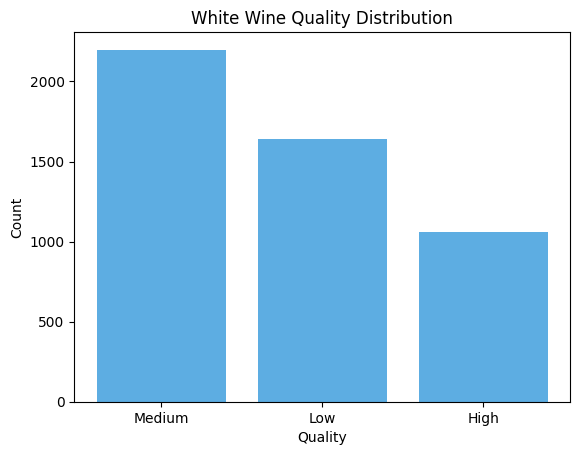

In [23]:
# Load the white winequality dataset
url = "https://raw.githubusercontent.com/bradykuo/clustering-and-classifying-the-wine-dataset/main/winequality-white.csv"
df = pd.read_csv(url)

# Split the data into features (X) and target variable (y)
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
quality_mapping = { 3 : "Low",4 : "Low",5: "Low",6 : "Medium",7: "High",8 : "High",9 : "High"}
y =  df['quality'].map(quality_mapping)

# Define the counts for each quality level
quality_counts = y.value_counts()

# Create a bar plot
plt.bar(quality_counts.index, quality_counts.values, color='#5DADE2')

# Set the title and axis labels
plt.title('White Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

In [29]:
# Define the logistic regression model
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
logreg_scores = cross_val_score(logreg, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", logreg_scores)

# Calculate and print the mean accuracy score across all folds
print("\nLogistic Regression Mean accuracy score:", logreg_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy scores for each fold:
 [0.54285714 0.57653061 0.55714286 0.59244127 0.57303371]

Logistic Regression Mean accuracy score: 0.5684011173417273


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [30]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
knn_scores = cross_val_score(knn, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", knn_scores)

# Calculate and print the mean accuracy score across all folds
print("\nKNN Mean accuracy score:", knn_scores.mean())

Accuracy scores for each fold:
 [0.52244898 0.5255102  0.49897959 0.50970378 0.49744637]

KNN Mean accuracy score: 0.5108177857455545


In [31]:
# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
lda_scores = cross_val_score(lda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", lda_scores)

# Calculate and print the mean accuracy score across all folds
print("\nLDA Mean accuracy score:", lda_scores.mean())

Accuracy scores for each fold:
 [0.56428571 0.57142857 0.56020408 0.60163432 0.57814096]

LDA Mean accuracy score: 0.575138729649163


In [32]:
# Define the QDA model
qda = QuadraticDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
qda_scores = cross_val_score(qda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", qda_scores)

# Calculate and print the mean accuracy score across all folds
print("\nQDA Mean accuracy score:", qda_scores.mean())

Accuracy scores for each fold:
 [0.53061224 0.50918367 0.53367347 0.5485189  0.52400409]

QDA Mean accuracy score: 0.5291984740780888


In [33]:
# Define the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rf, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", rf_scores)

# Calculate and print the mean accuracy score across all folds
print("\nRandom Forest Mean accuracy score:", rf_scores.mean())

Accuracy scores for each fold:
 [0.73571429 0.7255102  0.72346939 0.74463739 0.70480082]

Random Forest Mean accuracy score: 0.7268264159596424


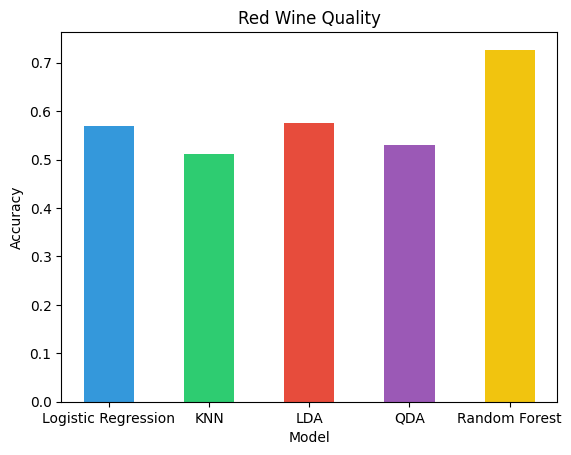

In [34]:
# Set x-axis labels
labels = ['Logistic Regression', 'KNN', 'LDA', 'QDA', 'Random Forest']

# Set y-axis values
values = [logreg_scores.mean(), knn_scores.mean(), lda_scores.mean(), qda_scores.mean(), rf_scores.mean()]

# Set bar colors and width
colors = ['#3498DB', '#2ECC71', '#E74C3C', '#9B59B6', '#F1C40F']
width = 0.5

# Plot bar chart
plt.bar(labels, values, width=width, color=colors)

# Set chart title and axis labels
plt.title('Red Wine Quality')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the chart
plt.show()